In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: >

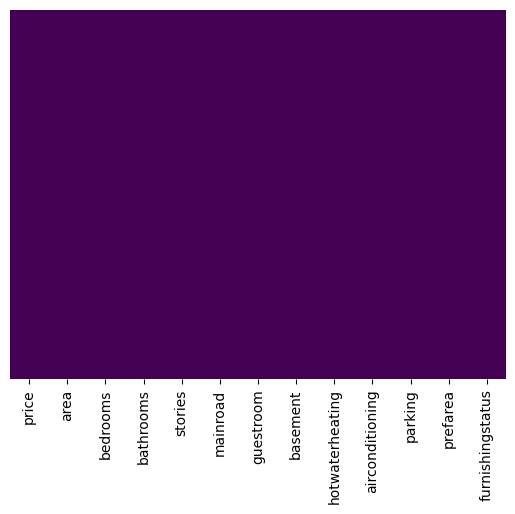

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()*100/data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

<Axes: xlabel='bedrooms', ylabel='count'>

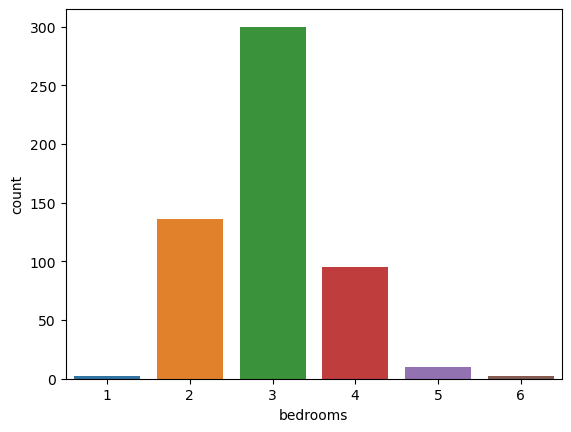

In [7]:
sns.countplot(x='bedrooms',data=data)

<Axes: xlabel='bathrooms', ylabel='count'>

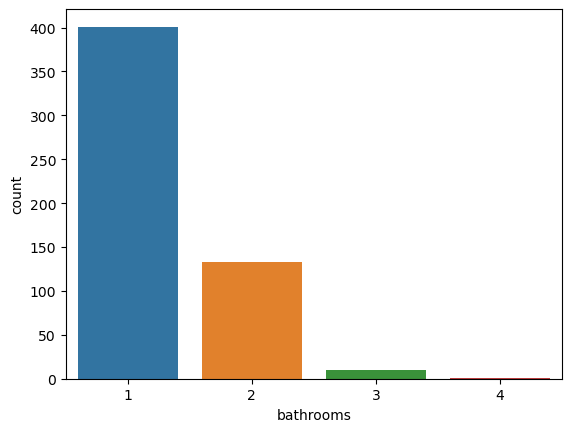

In [8]:
sns.countplot(x='bathrooms',data=data)

<Axes: xlabel='stories', ylabel='count'>

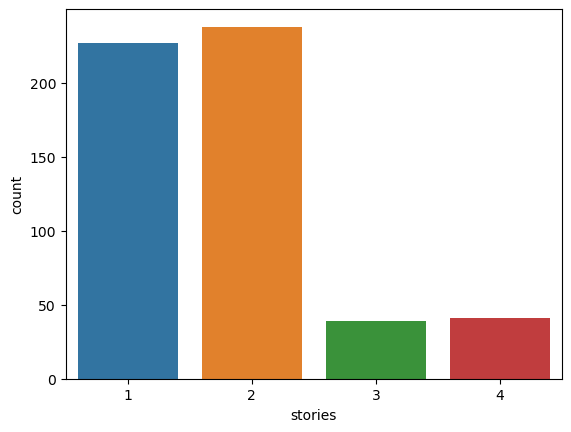

In [9]:
sns.countplot(x='stories',data=data)

In [10]:
mr = pd.get_dummies(data['mainroad'],drop_first=True)
gr = pd.get_dummies(data['guestroom'],drop_first=True)
bm = pd.get_dummies(data['basement'],drop_first=True)
hw = pd.get_dummies(data['hotwaterheating'],drop_first=True)
ac = pd.get_dummies(data['airconditioning'],drop_first=True)
pk = pd.get_dummies(data['parking'],drop_first=True)
pa = pd.get_dummies(data['prefarea'],drop_first=True)
fs = pd.get_dummies(data['furnishingstatus'],drop_first=True)

In [11]:
data.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'],axis=1,inplace=True)

In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2


<Axes: xlabel='bedrooms', ylabel='price'>

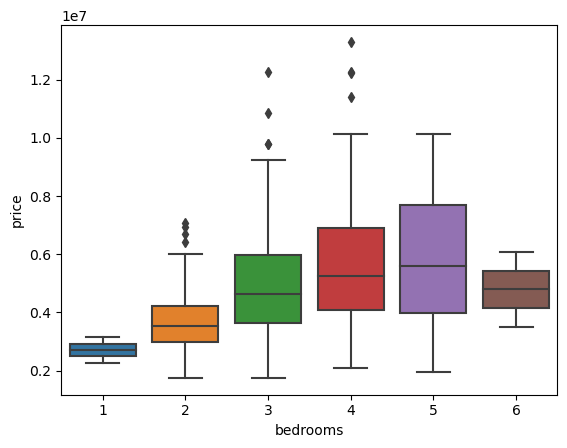

In [13]:
sns.boxplot(x='bedrooms',y='price',data=data)

<Axes: xlabel='bathrooms', ylabel='price'>

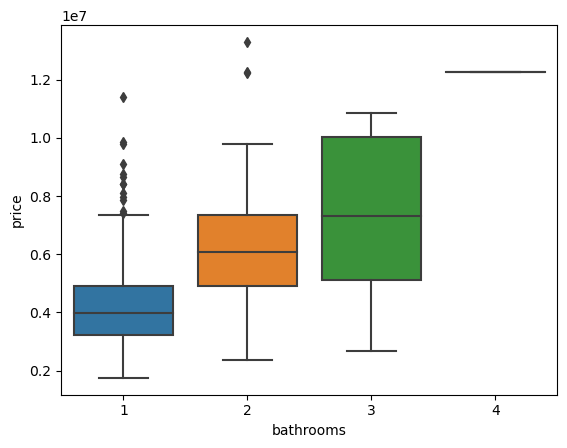

In [14]:
sns.boxplot(x='bathrooms',y='price',data=data)

<Axes: xlabel='stories', ylabel='price'>

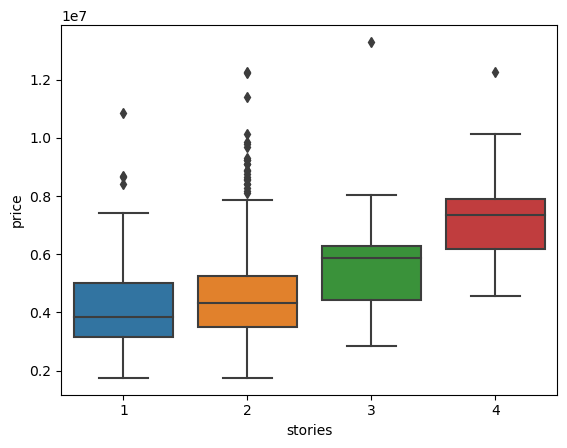

In [15]:
sns.boxplot(x='stories',y='price',data=data)

In [16]:
data=pd.concat([data,mr,gr,bm,hw,ac,pk,pa,fs],axis=1)

In [17]:
data.head()

,price,area,bedrooms,bathrooms,stories,yes,yes,yes,yes,yes,1,2,3,yes,semi-furnished,unfurnished
0,13300000,7420,4,2,3,True,False,False,False,True,False,True,False,True,False,False
1,12250000,8960,4,4,4,True,False,False,False,True,False,False,True,False,False,False
2,12250000,9960,3,2,2,True,False,True,False,False,False,True,False,True,True,False
3,12215000,7500,4,2,2,True,False,True,False,True,False,False,True,True,False,False
4,11410000,7420,4,1,2,True,True,True,False,True,False,True,False,False,False,False


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('price',axis=1),data['price'],test_size=0.30,random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
#sklearn can only take numpy array not pandas dataframe
x_train=np.array(x_train.values)
y_train=np.array(y_train.values)
x_test=np.array(x_test.values)
y_test=np.array(y_test.values)

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
model.intercept_

-86863.01151671913

In [25]:
model.coef_

array([ 2.64826877e+02,  1.00168506e+05,  9.59402871e+05,  4.65440809e+05,
        4.30788386e+05,  7.23859080e+04,  4.11710670e+05,  9.89274485e+05,
        8.38225261e+05,  3.86207688e+05,  5.68783757e+05,  8.13528952e+05,
        7.19740193e+05,  3.26333850e+04, -4.33628643e+05])

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [28]:
mean_absolute_error(y_test,y_pred)

816789.8931296302

In [29]:
mean_absolute_percentage_error(y_test,y_pred)

0.17305772998619695

In [30]:
mean_squared_error(y_test,y_pred)

1261980271990.2263

In [31]:
accuracy = (1-mean_absolute_percentage_error(y_test,y_pred))*100

In [32]:
print("Accuracy = " + str(accuracy) + "%")

Accuracy = 82.6942270013803%
